In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('Customer_Churn_Analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
(df==0).astype(bool).sum(axis=0)

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

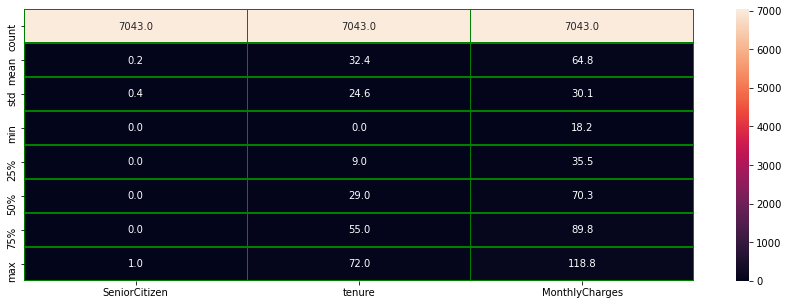

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

# Skewness of Columns

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64


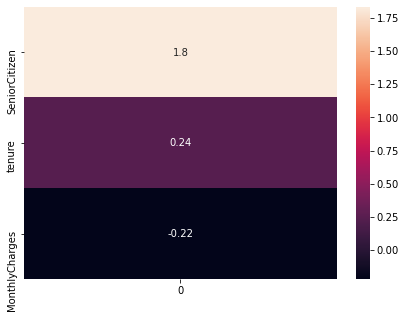

In [23]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(7,5))
sns.heatmap(skew1,annot=True)
plt.show()

# Correlation Heatmap

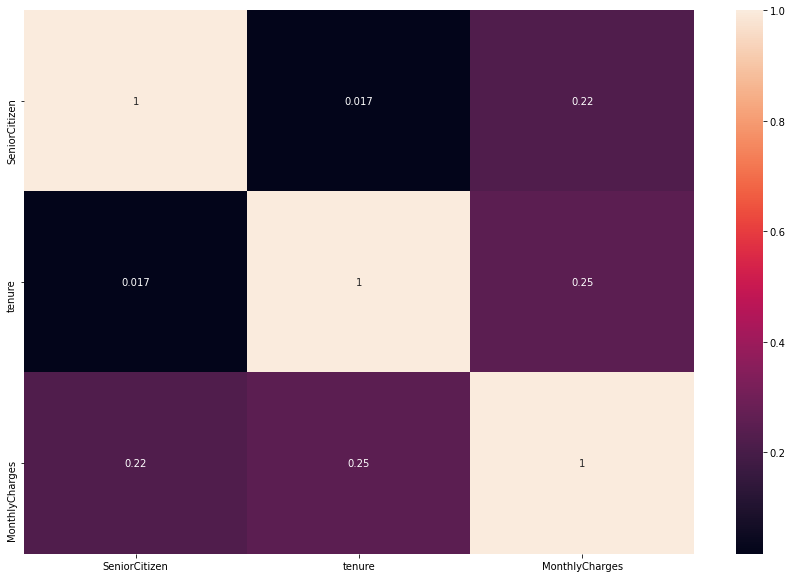

In [24]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Plots and Graphs

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


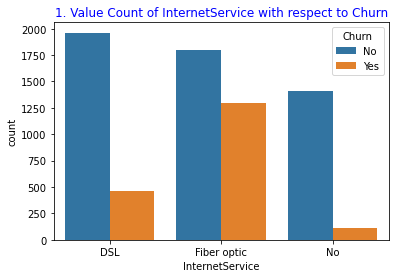

In [25]:
plt.title('1. Value Count of InternetService with respect to Churn',color='blue')
print(df['InternetService'].value_counts())
sns.countplot(x='InternetService',data=df,hue='Churn')
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


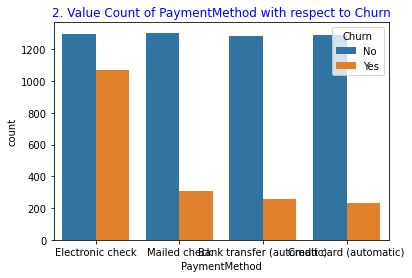

In [26]:
plt.title('2. Value Count of PaymentMethod with respect to Churn',color='blue')
print(df['PaymentMethod'].value_counts())
sns.countplot(x='PaymentMethod',data=df,hue='Churn')
plt.show()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


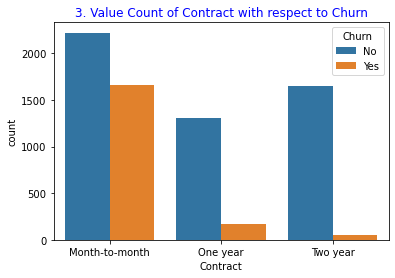

In [27]:
plt.title('3. Value Count of Contract with respect to Churn',color='blue')
print(df['Contract'].value_counts())
sns.countplot(x='Contract',data=df,hue='Churn')
plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64


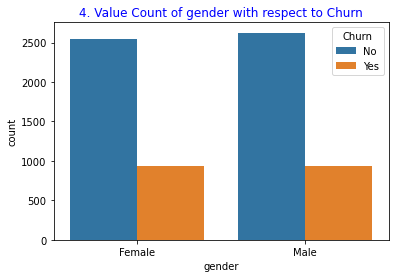

In [28]:
plt.title('4. Value Count of gender with respect to Churn',color='blue')
print(df['gender'].value_counts())
sns.countplot(x='gender',data=df,hue='Churn')
plt.show()

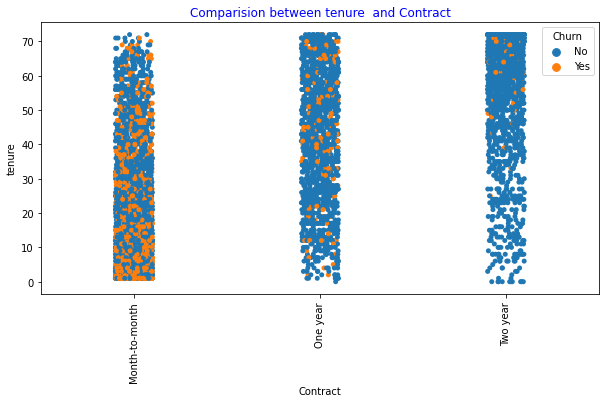

In [29]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between tenure  and Contract',color='blue')
sns.stripplot(x='Contract',y='tenure',data=df,hue='Churn')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.title('Comparision between tenure  and TotalCharges',color='blue')
sns.stripplot(x='tenure',y='TotalCharges',data=df,hue='Churn')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between TotalCharges and MonthlyCharges',color='blue')
sns.stripplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

In [ ]:
sns.violinplot(x='InternetService',data=df)

In [ ]:
sns.pairplot(df,hue='Churn')

# Removing Outliers

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
df.boxplot()
plt.show()

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df.apply(zscore)
threshold=3
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)
print(602/614)
df1.head()

# Label Encoding Columns

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lenc=LabelEncoder()
for i in df.columns:
    df[i]=lenc.fit_transform(df[i])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


# Train, Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.drop(['Churn'],axis=1)
print(x.shape)
y1=df['Churn'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)
print(y1.shape)

(7043, 20)
(7043, 1)
(7043,)


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 20)
(1409, 20)
(5634, 1)
(1409, 1)


# Here we use Classifier Model as the Target is Binary Classification

# 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [36]:
grid={"C":np.logspace(-3,3,7), "penalty":["none","l2"]}# l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7974742703097639


In [37]:
lg=LogisticRegression(C=0.01,penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test) 
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 80.76650106458482 Percentage
Confusion Matrix 
 [[930 106]
 [165 208]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



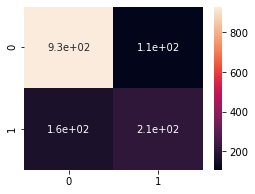

In [38]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predlg),annot=True)
plt.show()

# 2. Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
grid= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc1=DecisionTreeClassifier()
dtc1_cv=GridSearchCV(dtc1,grid,cv=5)
dtc1_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",dtc1_cv.best_params_)
print("Accuracy :",dtc1_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 5}
Accuracy : 0.7811506995260842


In [41]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 78.49538679914833 Percentage
Confusion Matrix 
 [[903 133]
 [170 203]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.60      0.54      0.57       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



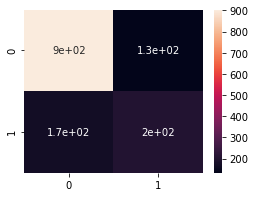

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,preddtc),annot=True)
plt.show()

# 3. Support Vector Classifier

In [43]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [44]:
svm1=SVC()
gamma_range=[0.01, 0.1, 1, 10, 100]
c_range=[0.01, 0.1, 1, 10, 100]
grid= dict(gamma = gamma_range, C = c_range)
svm1_cv=GridSearchCV(svm1,grid,cv=5)
svm1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm1_cv.best_params_)
print("accuracy :",svm1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'gamma': 0.01}
accuracy : 0.7344692916165616


In [45]:
svc=SVC(C=0.01,gamma=0.01)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.7352732434350603
Confusion Matrix [[1036    0]
 [ 373    0]]
Classification Report               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



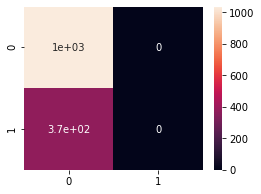

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predsvc),annot=True)
plt.show()

# 4. K-Neighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.7295954577714692
Confusion Matrix 
 [[911 150]
 [231 117]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1061
           1       0.44      0.34      0.38       348

    accuracy                           0.73      1409
   macro avg       0.62      0.60      0.60      1409
weighted avg       0.71      0.73      0.72      1409



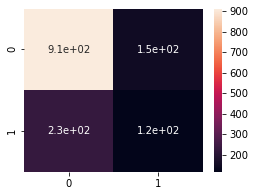

In [50]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predknn),annot=True)
plt.show()

# 5. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc1=RandomForestClassifier()
parameters={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']
}
rfc_cv=GridSearchCV(rfc1,parameters,cv=10)
rfc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("Accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy : 0.7978348638877341


In [53]:
rfc=RandomForestClassifier(random_state=42,max_features='sqrt',criterion='gini',max_depth=6,n_estimators=200)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.8204400283889283
Confusion Matrix 
 [[971  90]
 [163 185]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.92      0.88      1061
           1       0.67      0.53      0.59       348

    accuracy                           0.82      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409



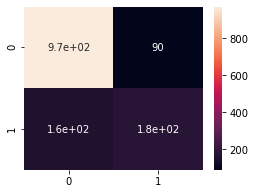

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predrfc),annot=True)
plt.show()

# 6. AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.808374733853797
Confusion Matrix 
 [[945 116]
 [154 194]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.56      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



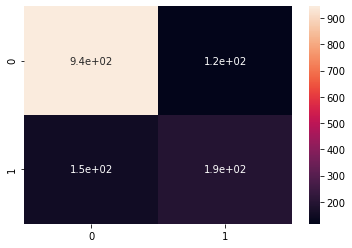

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,predad),annot=True)
plt.show()

# Cross Validation Score

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression(C=0.01) = [0.80425532 0.8070922  0.79432624 0.81392045 0.78835227 0.78835227
 0.796875   0.79119318 0.79403409 0.80539773]
Mean Score of LogisticRegression(C=0.01) = 0.7983798758865248
Difference of Accuracy in LogisticRegression(C=0.01) and Cross Val Score of LogisticRegression(C=0.01) is= 0.005026795511629878


Cross Val Score of DecisionTreeClassifier(max_depth=8) = [0.74326241 0.76312057 0.77588652 0.77414773 0.78977273 0.75852273
 0.78267045 0.76420455 0.78267045 0.79403409]
Mean Score of DecisionTreeClassifier(max_depth=8) = 0.7728292230818827
Difference of Accuracy in DecisionTreeClassifier(max_depth=8) and Cross Val Score of DecisionTreeClassifier(max_depth=8) is= 0.06748305512961483


Cross Val Score of SVC(C=0.01, gamma=0.01) = [0.73475177 0.73475177 0.73475177 0.73579545 0.734375   0.734375
 0.734375   0.734375   0.734375   0.734375  ]
Mean Score of SVC(C=0.01, gamma=0.01) = 0.7346300773694391
Difference of Accuracy in SVC(C=0.01, gamma=

# Conclusion

Here AdaBoost Classifier give the highest accuracy score. Hence we use ad for Testing of Dataset.

# Saving the Model

In [ ]:
import joblib
joblib.dump(ad,'bankad.org')
bankfile=joblib.load('bankad.org')